#### Import the required libraries we need for the lab.


In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [13]:
import io

#### Read the dataset in the csv file from the URL


In [14]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [15]:
df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [17]:
df = df.drop(["Unnamed: 0"], axis = 1)

In [18]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [20]:
np.percentile(df["MEDV"], [25, 50, 75])

array([17.025, 21.2  , 25.   ])

Text(0, 60, ' 21.20')

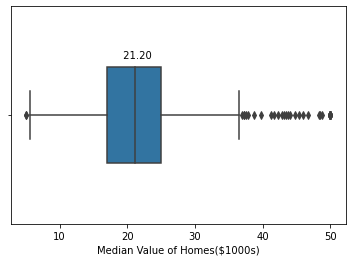

In [24]:
# For the "Median value of owner-occupied homes" provide a boxplot

ax = sns.boxplot(x="MEDV", data = df, width = .44)
pyplot.xlabel('Median Value of Homes($1000s)')

median = df["MEDV"].median()

ax.annotate(f'{median: .2f}', (median, 0), ha = "center", va = "center", xytext=(0,60), textcoords = "offset points")

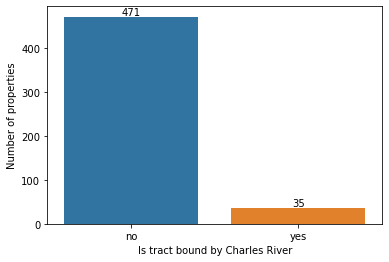

In [25]:
# Provide a bar plot for the Charles river variable

df["CHAS_MAPPED"] = df["CHAS"].map({0.0: "no", 1.0: "yes"})

ax1 = sns.countplot(x="CHAS_MAPPED", data = df)

pyplot.xlabel("Is tract bound by Charles River")
pyplot.ylabel("Number of properties")

for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = "center", va = "center", xytext=(0,5), textcoords = "offset points")

In [26]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of
# 35 years and younger, between 35 and 70 and 70 years and older

In [28]:
df["AGE_GROUP"] = pd.cut(df["AGE"], bins = [-float("inf"), 35, 70, float("inf")], labels = ["35 and younger", "35 to 70", "70 and older"])

medians = df.groupby(["AGE_GROUP"])["MEDV"].median()

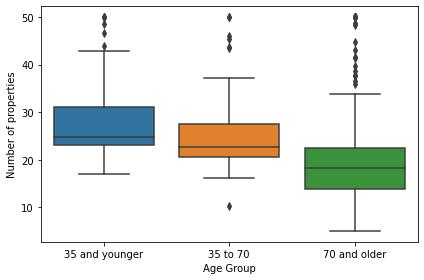

In [29]:
sns.boxplot(x="AGE_GROUP", y="MEDV", data = df)
pyplot.xlabel("Age Group")
pyplot.ylabel("Number of properties")

# I tried everything to make at least median labels to be visible but its absolutely impossible ;/
for tick, label in enumerate(ax.get_xticklabels()):
    age_group = label.get_text()
    if age_group in medians.index:
        median_value = medians[age_group]
        ax.annotate(f'{round(median_value, 2)}',
                    xy = (tick, median_value),
                    xytext = (0, 10),
                    textcoords = 'offset points',
                    ha= 'center', va = 'center',
                    fontsize = 'medium', color = 'black', weight = 'semibold')
        
pyplot.tight_layout()

In [30]:
# Provide a scatter plot to show the relationship between Nitrix Oxide concentrations ona dthe proportion of non-retail
# business acres per town. What can you say about the relationship?

Text(0, 0.5, 'Number of non-retail business acres per town')

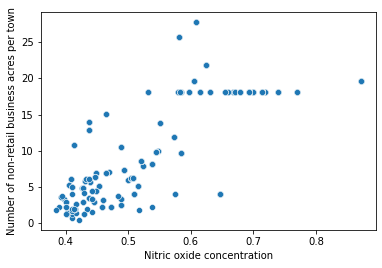

In [31]:
sns.scatterplot(data = df, x = "NOX", y = "INDUS")
pyplot.xlabel("Nitric oxide concentration")
pyplot.ylabel("Number of non-retail business acres per town")

In [32]:
# Checking the correlation coefficient
coef = np.corrcoef(df["NOX"], df["INDUS"])[0, 1]
coef

0.7636514469209147

In [33]:
# There is strong positive correlation between Nitric Oxide concentrations and the proportion of
# non-retail business acres per town

In [34]:
# Create a histogram for the pupil to teacher ratio variable

Text(0, 0.5, ' ')

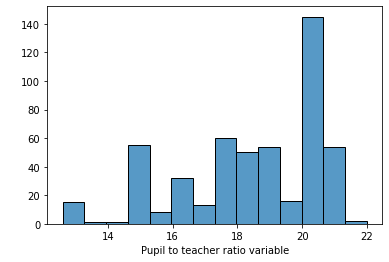

In [35]:
sns.histplot(data = df["PTRATIO"])
pyplot.xlabel("Pupil to teacher ratio variable")
pyplot.ylabel(" ")

In [36]:
# Is there a significant difference in median calue of houses bounded by the Charles River or not?
# (T-test for independent samples)

In [37]:
from scipy import stats

In [40]:
group1 = df[df["CHAS"] == 1]["MEDV"]
group2 = df[df["CHAS"] == 0]["MEDV"]

# T-test for independent samples
t_statistic , p_value = stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}, (please note, e-05 means 10 to minus 5 exponential)")

if p_value < 0.005:
    print("There is a significant difference in the median value of houses bounded by the Charles River")
else:
    print("There is no significant difference in the median value of houses bounded by the Charles River")

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05, (please note, e-05 means 10 to minus 5 exponential)
There is a significant difference in the median value of houses bounded by the Charles River


In [41]:
# Can we conclude that there is no relationship between Nitric Oxide and proportion of non-retail businesses acres per town?
# Pearson Correlation

In [42]:
# NOX to INDUS

In [43]:
pearson = df["NOX"].corr(df["INDUS"])
print(pearson)

0.7636514469209147


In [44]:
# The result indicates that there is strong positive correlation

In [45]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner
# occupied homes? (Regression analysis)

In [49]:
X = df[["DIS"]]

In [50]:
X = sm.add_constant(X)

In [52]:
y = df["MEDV"]

In [53]:
model = sm.OLS(y, X).fit()

In [54]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 05 May 2025   Prob (F-statistic):           1.21e-08
Time:                        16:04:22   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [55]:
# The regression analysis indicates that there is a statistically significant positive relationship between the weighted
# distance to the five Boston employment centres (DIS) and the median value of owner-occupied homes (MEDV).
# Specifically, as the distance increases, the median value of homes tends to decrease. However, relatively low R-squared value
# suggests that other factors not included in this model also play a significant role in determining home values.